In [1]:
# ライブラリの取得
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font="IPAexGothic",style="white")　多分いらなそう
# import oandapy
import configparser
import datetime
from datetime import datetime, timedelta

import warnings
warnings.simplefilter('ignore')

# CSVデータの読み込み
import os
working_directory=os.getcwd()
#print(working_directory)
path_train=working_directory+'/train_finance.csv'
path_test=working_directory+'/test_finance.csv'
# path_test=working_directory+'/test_finance_last10elminate.csv'
path_latest=working_directory+'/test_latest.csv'
path_submit=working_directory+'/submit_finance.csv'

#データフレームの生成
df_train=pd.read_csv(path_train)
df_test=pd.read_csv(path_test)
df_latest=pd.read_csv(path_latest)
df_submit=pd.read_csv(path_submit)

In [2]:
#データの確認
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2074 non-null   object 
 1   High    2074 non-null   float64
 2   Low     2074 non-null   float64
 3   Open    2074 non-null   float64
 4   Close   2074 non-null   float64
dtypes: float64(4), object(1)
memory usage: 81.1+ KB


In [3]:
#データの確認
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1246 non-null   object 
 1   High    1246 non-null   float64
 2   Low     1246 non-null   float64
 3   Open    1246 non-null   float64
 4   Close   1246 non-null   float64
dtypes: float64(4), object(1)
memory usage: 48.8+ KB


In [4]:
# Dateがobject型になっているので日付型に変換
df_train['Date']=pd.to_datetime(df_train['Date'],format='%Y/%m/%d')
df_test['Date']=pd.to_datetime(df_test['Date'],format='%Y/%m/%d')
df_latest['Date']=pd.to_datetime(df_latest['Date'],format='%Y/%m/%d')

In [5]:
# fig = plt.subplots(figsize=(30,10))
# plt.plot(df_train)

In [6]:
df_train

,Date,High,Low,Open,Close
0,2003-12-01,111.370639,110.482062,111.314347,110.676377
1,2003-12-02,112.008532,110.500532,110.639316,111.823016
2,2003-12-03,112.202814,111.712284,111.832477,112.137524
3,2003-12-04,112.332259,111.406851,112.110343,111.748717
4,2003-12-05,112.766375,111.609834,111.721723,112.729259
...,...,...,...,...,...
2069,2011-12-08,124.476855,123.126484,123.959751,123.984661
2070,2011-12-09,124.227770,122.895824,123.445260,123.445260
2071,2011-12-12,123.745819,122.202555,123.681290,123.687906
2072,2011-12-13,122.393352,121.174807,121.782641,121.832361


In [7]:
df_train

,Date,High,Low,Open,Close
0,2003-12-01,111.370639,110.482062,111.314347,110.676377
1,2003-12-02,112.008532,110.500532,110.639316,111.823016
2,2003-12-03,112.202814,111.712284,111.832477,112.137524
3,2003-12-04,112.332259,111.406851,112.110343,111.748717
4,2003-12-05,112.766375,111.609834,111.721723,112.729259
...,...,...,...,...,...
2069,2011-12-08,124.476855,123.126484,123.959751,123.984661
2070,2011-12-09,124.227770,122.895824,123.445260,123.445260
2071,2011-12-12,123.745819,122.202555,123.681290,123.687906
2072,2011-12-13,122.393352,121.174807,121.782641,121.832361


In [8]:
# Dateが日付型に変更されたかどうかの確認
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2074 non-null   datetime64[ns]
 1   High    2074 non-null   float64       
 2   Low     2074 non-null   float64       
 3   Open    2074 non-null   float64       
 4   Close   2074 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 81.1 KB


In [9]:
# Dateが日付型に変更されたかどうかの確認
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1246 non-null   datetime64[ns]
 1   High    1246 non-null   float64       
 2   Low     1246 non-null   float64       
 3   Open    1246 non-null   float64       
 4   Close   1246 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 48.8 KB


In [10]:
# Dateが日付型に変更されたかどうかの確認
df_latest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10 non-null     datetime64[ns]
 1   High    10 non-null     float64       
 2   Low     10 non-null     float64       
 3   Open    10 non-null     float64       
 4   Close   10 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 528.0 bytes


In [11]:
df_train.head()

,Date,High,Low,Open,Close
0,2003-12-01,111.370639,110.482062,111.314347,110.676377
1,2003-12-02,112.008532,110.500532,110.639316,111.823016
2,2003-12-03,112.202814,111.712284,111.832477,112.137524
3,2003-12-04,112.332259,111.406851,112.110343,111.748717
4,2003-12-05,112.766375,111.609834,111.721723,112.729259


In [12]:
#データの確認
df_train.describe()

,High,Low,Open,Close
count,2074.000000,2074.000000,2074.000000,2074.000000
mean,124.078238,122.910559,123.526205,123.529490
std,9.210193,9.493319,9.188003,9.184970
min,108.520946,6.743457,107.993884,107.998923
25%,117.002707,115.863246,116.408944,116.427990
50%,123.242134,121.951219,122.590435,122.573382
75%,130.814157,129.393252,130.201913,130.179930
max,148.260942,146.834717,147.832063,147.888796


In [13]:
#データの確認
df_test.describe()

,High,Low,Open,Close
count,1246.000000,1246.000000,1246.000000,1246.000000
mean,111.424603,110.675657,111.069958,111.070373
std,9.206534,9.270658,9.215541,9.214999
min,96.767439,70.352906,96.364197,96.357173
25%,103.722807,103.064503,103.422443,103.422154
50%,108.456692,107.796669,108.091687,108.082215
75%,120.690221,119.751722,120.218867,120.219641
max,129.417693,128.691531,128.851618,128.858797


In [14]:
#データの確認
df_latest.describe()

,High,Low,Open,Close
count,10.000000,10.000000,10.000000,10.000000
mean,103.334161,102.926054,103.071625,103.074446
std,0.361769,0.337125,0.340458,0.340053
min,102.720708,102.515795,102.629538,102.632956
25%,103.155731,102.769785,102.843781,102.842064
50%,103.281038,102.817198,103.000376,103.011844
75%,103.464673,102.943638,103.359891,103.364806
max,103.979324,103.606639,103.641461,103.621249


In [15]:
#欠損値の確認
print(f'欠損データ確認(df_train)\n{df_train.isnull().sum()}\n')
print(f'欠損データを確認(df_test)\n{df_test.isnull().sum()}\n')

欠損データ確認(df_train)
Date     0
High     0
Low      0
Open     0
Close    0
dtype: int64

欠損データを確認(df_test)
Date     0
High     0
Low      0
Open     0
Close    0
dtype: int64



## Trainデータを学習用と検証用に分割
#### (train:2003/12/1-2011/12/14 →これを8:2に分割する| test:2011/12/15-2019/12/31)

In [16]:
# 不要
# Trainデータを学習用と検証用に分割
# 今回は①学習用：8割、②検証用：2割にTrainデータを分割して、①の予測モデルで
# ②が正しく評価できるのかを確認した上で、testデータへの予測モデルの適用を行う

In [17]:
# 不要
# train_test_splitというDataFrameを分けてくれる関数がsklearnにあるのでそれを使う
# from sklearn.model_selection import train_test_split

# df_train, df_validation = train_test_split(df_train, train_size=0.8, test_size=0.2, shuffle=False)

In [18]:
# 不要
# # 分割後のサイズ
# print(f'①学習用データのサイズ(df_train)：{len(df_train)}')
# print(f'②検証用データのサイズ(df_validation)：{len(df_validation)}')
# print(f'元々のdf_trainのサイズが8:2に分割された\n')

# # 分割後の詳細
# print(f'分割後のサマリ(df_train)\n{df_train.describe()}\n')
# print(f'分割後のサマリ(df_validation)\n{df_validation.describe()}\n')

## *Train/test/latestデータの縦結合(直接今回の課題とは関係なし)

In [19]:
# df_Merged=pd.concat([df_train,df_test,df_latest])
df_Merged = pd.DataFrame(np.concatenate([df_train.values, df_test.values, df_latest.values]), columns=df_train.columns)

In [20]:
df_Merged

,Date,High,Low,Open,Close
0,2003-12-01,111.370639,110.482062,111.314347,110.676377
1,2003-12-02,112.008532,110.500532,110.639316,111.823016
2,2003-12-03,112.202814,111.712284,111.832477,112.137524
3,2003-12-04,112.332259,111.406851,112.110343,111.748717
4,2003-12-05,112.766375,111.609834,111.721723,112.729259
...,...,...,...,...,...
3325,2019-12-19,103.067513,102.766359,102.822331,102.822331
3326,2019-12-26,102.720708,102.515795,102.629538,102.632956
3327,2019-12-27,103.421288,102.67499,102.686502,102.685356
3328,2019-12-30,103.791471,103.429382,103.429382,103.436318


In [21]:
df_Merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330 entries, 0 to 3329
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3330 non-null   datetime64[ns]
 1   High    3330 non-null   object        
 2   Low     3330 non-null   object        
 3   Open    3330 non-null   object        
 4   Close   3330 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 130.2+ KB


##　LSTMモデルへ訓練させるための前処理

In [22]:
##　LSTMモデルへ訓練させるための前処理

In [23]:
# windowを設定
window_len=10
# window_len=6 #11/6の中間報告でのアドバイスを受け修正しようとしたが、後に出てくる未来予測のところでエラーが出るため一旦保留

In [24]:
# # Closeの単価だけ抽出
# df_train=df_train['Close']
# df_test=df_test['Close']
# df_latest=df_latest['Close']

In [25]:
# Dateそぎ落とし
# del df_train['Date']
# del df_test['Date']
# del df_latest['Date']

In [26]:
# Dateをインデックスに指定
df_train.set_index('Date',inplace=True)
df_test.set_index('Date',inplace=True)
df_latest.set_index('Date',inplace=True)

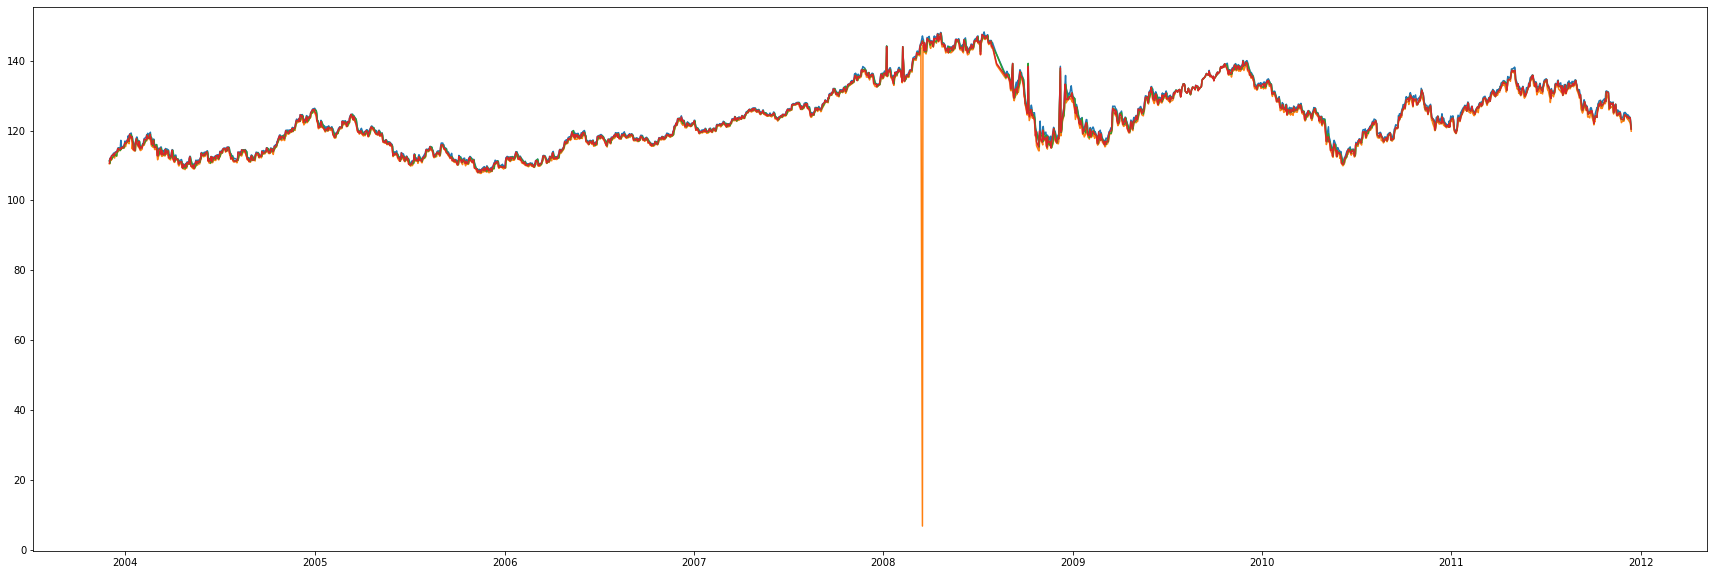

In [27]:
fig = plt.subplots(figsize=(30,10))
plt.plot(df_train)

In [28]:
# 分割後の詳細
print(f'単価抽出後のサマリ(df_train)\n{df_train.describe()}\n')
print(f'単価抽出後のサマリ(df_test)\n{df_test.describe()}\n')
print(f'単価抽出後のサマリ(df_latest)\n{df_latest.describe()}\n')

単価抽出後のサマリ(df_train)
              High          Low         Open        Close
count  2074.000000  2074.000000  2074.000000  2074.000000
mean    124.078238   122.910559   123.526205   123.529490
std       9.210193     9.493319     9.188003     9.184970
min     108.520946     6.743457   107.993884   107.998923
25%     117.002707   115.863246   116.408944   116.427990
50%     123.242134   121.951219   122.590435   122.573382
75%     130.814157   129.393252   130.201913   130.179930
max     148.260942   146.834717   147.832063   147.888796

単価抽出後のサマリ(df_test)
              High          Low         Open        Close
count  1246.000000  1246.000000  1246.000000  1246.000000
mean    111.424603   110.675657   111.069958   111.070373
std       9.206534     9.270658     9.215541     9.214999
min      96.767439    70.352906    96.364197    96.357173
25%     103.722807   103.064503   103.422443   103.422154
50%     108.456692   107.796669   108.091687   108.082215
75%     120.690221   119.751722 

In [29]:
df_train.head()

,High,Low,Open,Close
Date,,,,
2003-12-01,111.370639,110.482062,111.314347,110.676377
2003-12-02,112.008532,110.500532,110.639316,111.823016
2003-12-03,112.202814,111.712284,111.832477,112.137524
2003-12-04,112.332259,111.406851,112.110343,111.748717
2003-12-05,112.766375,111.609834,111.721723,112.729259


In [30]:
# LSTMへの入力用に処理の関数

def data_maker(data):
  data_lstm_in=[]
  if len(data)==window_len:
    temp = data[:window_len].copy()
    temp = temp / temp.iloc[0] - 1
    data_lstm_in.append(temp)
  for i in range(len(data) - window_len): #今回のLSTMで生成する時系列データ数(train総数-10個のモデル)
      temp = data[i:(i + window_len)].copy() #windowの単位で行を取得。参照渡しでなく値渡し。
      temp = temp / temp.iloc[0] - 1
      data_lstm_in.append(temp)
  return data_lstm_in

In [31]:
#関数の実行(Trainデータ)
train_lstm_in = data_maker(df_train)

In [32]:
# 配列抜粋
print(f'train_lstm_in_配列数 : {len(train_lstm_in)}\n')
print(f'train_lstm_in[0]\n{train_lstm_in[0]}\n')
print(f'train_lstm_in[1]\n{train_lstm_in[1]}\n')
print(f'train_lstm_in[-1]\n{train_lstm_in[-1]}\n')

train_lstm_in_配列数 : 2064

train_lstm_in[0]
                High       Low      Open     Close
Date                                              
2003-12-01  0.000000  0.000000  0.000000  0.000000
2003-12-02  0.005728  0.000167 -0.006064  0.010360
2003-12-03  0.007472  0.011135  0.004655  0.013202
2003-12-04  0.008634  0.008370  0.007151  0.009689
2003-12-05  0.012532  0.010208  0.003660  0.018549
2003-12-08  0.016610  0.017587  0.011134  0.021312
2003-12-09  0.019680  0.021261  0.015545  0.023814
2003-12-10  0.018767  0.018255  0.017871  0.018884
2003-12-11  0.016187  0.014984  0.013044  0.021649
2003-12-12  0.022089  0.022521  0.016042  0.026240

train_lstm_in[1]
                High       Low      Open     Close
Date                                              
2003-12-02  0.000000  0.000000  0.000000  0.000000
2003-12-03  0.001735  0.010966  0.010784  0.002813
2003-12-04  0.002890  0.008202  0.013296 -0.000664
2003-12-05  0.006766  0.010039  0.009783  0.008104
2003-12-08  0.010820 

In [33]:
lstm_train_out = (df_train['Open'][window_len:].values / df_train['Open'][:-window_len].values)-1

In [34]:
lstm_train_out

array([ 0.01271095,  0.02951676,  0.01902212, ...,  0.00455942,
       -0.01066412, -0.02221258])

In [35]:
#関数の実行(Testデータ)
test_lstm_in = data_maker(df_test)

In [36]:
# 配列抜粋(Testデータ)
print(f'test_lstm_in_配列数 : {len(test_lstm_in)}\n')
print(f'test_lstm_in[0]\n{test_lstm_in[0]}\n')
print(f'test_lstm_in[1]\n{test_lstm_in[1]}\n')
print(f'test_lstm_in[-1]\n{test_lstm_in[-1]}\n')

test_lstm_in_配列数 : 1236

test_lstm_in[0]
                High       Low      Open     Close
Date                                              
2011-12-15  0.000000  0.000000  0.000000  0.000000
2011-12-16  0.002682  0.003395  0.003284  0.003205
2011-12-19 -0.000613  0.001701  0.003741  0.003768
2011-12-20  0.006356  0.002625  0.001587  0.001522
2011-12-21  0.011123  0.005055  0.007748  0.007696
2011-12-22  0.005366  0.004675  0.003898  0.004003
2011-12-29 -0.008051 -0.007845 -0.004744 -0.004680
2011-12-30 -0.004068 -0.004388 -0.002707 -0.002462
2012-01-02 -0.006521 -0.003114 -0.002100 -0.002151
2012-01-03  0.001294 -0.002057 -0.003933 -0.003623

test_lstm_in[1]
                High       Low      Open     Close
Date                                              
2011-12-16  0.000000  0.000000  0.000000  0.000000
2011-12-19 -0.003286 -0.001688  0.000456  0.000561
2011-12-20  0.003664 -0.000767 -0.001691 -0.001678
2011-12-21  0.008418  0.001655  0.004450  0.004476
2011-12-22  0.002676  0.

In [37]:
lstm_test_out = (df_test['Open'][window_len:].values / df_test['Open'][:-window_len].values)-1

In [38]:
lstm_test_out

array([ 0.00513026, -0.00760332, -0.02393378, ...,  0.00227569,
        0.00900109,  0.01099161])

In [39]:
#関数の実行(Latestデータ)
latest_lstm_in = data_maker(df_latest)

In [40]:
# 配列抜粋
print(f'latest_lstm_in_配列数 : {len(latest_lstm_in)}\n')
print(f'latest_lstm_in\n{latest_lstm_in[0]}\n')
#print(f'latest_lstm_in\n{latest_lstm_in[1]}\n')
# print(f'latest_lstm_in\n{latest_lstm_in[-1]}\n')

latest_lstm_in_配列数 : 1

latest_lstm_in
                High       Low      Open     Close
Date                                              
2019-12-12  0.000000  0.000000  0.000000  0.000000
2019-12-13  0.003009  0.000634  0.004507  0.004508
2019-12-16  0.000402  0.001046 -0.000723 -0.001023
2019-12-17  0.001777  0.001714  0.000345  0.000100
2019-12-18 -0.000167 -0.000044  0.001639  0.001394
2019-12-19 -0.000981 -0.000178 -0.001556 -0.001790
2019-12-26 -0.004342 -0.002616 -0.003428 -0.003628
2019-12-27  0.002449 -0.001067 -0.002875 -0.003119
2019-12-30  0.006037  0.006273  0.004338  0.004171
2019-12-31  0.007858  0.007997  0.006398  0.005966



## Numpy配列への変換

In [41]:
# PandasのデータフレームからNumpy配列へ変換。リスト内包表記という記法がここでは使われている。
train_lstm_in = [np.array(train_lstm_input) for train_lstm_input in train_lstm_in]
train_lstm_in = np.array(train_lstm_in)

test_lstm_in = [np.array(test_lstm_input) for test_lstm_input in test_lstm_in]
test_lstm_in = np.array(test_lstm_in)

In [42]:
# 11/6 latestデータのnumpyへの置き換え
latest_lstm_in = [np.array(test_lstm_input) for test_lstm_input in latest_lstm_in]
latest_lstm_in = np.array(latest_lstm_in)

In [43]:
print(f'train_lstm_in.shape[0] : {train_lstm_in.shape[0]}')
print(f'train_lstm_in.shape[1] : {train_lstm_in.shape[1]}')
print(f'train_lstm_in.shape[2] : {train_lstm_in.shape[2]}')

train_lstm_in.shape[0] : 2064
train_lstm_in.shape[1] : 10
train_lstm_in.shape[2] : 4


In [44]:
train_lstm_in

array([[[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00572766,  0.00016718, -0.00606419,  0.01036029],
        [ 0.00747212,  0.01113504,  0.00465466,  0.01320198],
        ...,
        [ 0.01876704,  0.01825526,  0.01787141,  0.01888387],
        [ 0.01618683,  0.01498399,  0.01304439,  0.02164884],
        [ 0.02208933,  0.0225208 ,  0.01604186,  0.02624016]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00173453,  0.01096603,  0.01078424,  0.00281255],
        [ 0.0028902 ,  0.00820195,  0.0132957 , -0.00066443],
        ...,
        [ 0.0103996 ,  0.01481434,  0.01922516,  0.0111728 ],
        [ 0.0162685 ,  0.02234989,  0.02224093,  0.01571704],
        [ 0.01783419,  0.01942404,  0.01888969,  0.01910834]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00115366, -0.0027341 ,  0.00248466, -0.00346723],
        [ 0.0050227 , -0.00091709, -0.00099035,  0.00527686],
        ...,
        [ 0.0145088 ,  0.01

## モデルの定義

In [45]:
# モデルの定義
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [46]:
# LSTMのモデルを設定
def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
 
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2]))) #バッチ数、時系列データ数、特徴量数
    model.add(Dropout(dropout)) 
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
 
    model.compile(loss=loss, optimizer=optimizer)
    return model

## データの学習と予測

In [47]:
np.random.seed(202)
 
# 初期モデルの構築
yen_model = build_model(train_lstm_in, output_size=1, neurons = 20)

# データを流してフィッティングさせる
yen_history = yen_model.fit(train_lstm_in, lstm_train_out, 
                            epochs=30, batch_size=1, verbose=2, shuffle=False)
# 11/5 epochs=50からepochs=10に変更
# 11/5 shuffle=TrueからFalseに変更

Epoch 1/30
2064/2064 - 5s - loss: 0.0084
Epoch 2/30
2064/2064 - 4s - loss: 0.0062
Epoch 3/30
2064/2064 - 4s - loss: 0.0058
Epoch 4/30
2064/2064 - 4s - loss: 0.0055
Epoch 5/30
2064/2064 - 4s - loss: 0.0052
Epoch 6/30
2064/2064 - 4s - loss: 0.0051
Epoch 7/30
2064/2064 - 4s - loss: 0.0049
Epoch 8/30
2064/2064 - 4s - loss: 0.0048
Epoch 9/30
2064/2064 - 4s - loss: 0.0047
Epoch 10/30
2064/2064 - 4s - loss: 0.0047
Epoch 11/30
2064/2064 - 4s - loss: 0.0047
Epoch 12/30
2064/2064 - 4s - loss: 0.0047
Epoch 13/30
2064/2064 - 4s - loss: 0.0045
Epoch 14/30
2064/2064 - 4s - loss: 0.0044
Epoch 15/30
2064/2064 - 4s - loss: 0.0044
Epoch 16/30
2064/2064 - 4s - loss: 0.0044
Epoch 17/30
2064/2064 - 4s - loss: 0.0044
Epoch 18/30
2064/2064 - 4s - loss: 0.0044
Epoch 19/30
2064/2064 - 4s - loss: 0.0043
Epoch 20/30
2064/2064 - 4s - loss: 0.0043
Epoch 21/30
2064/2064 - 4s - loss: 0.0041
Epoch 22/30
2064/2064 - 4s - loss: 0.0043
Epoch 23/30
2064/2064 - 4s - loss: 0.0042
Epoch 24/30
2064/2064 - 4s - loss: 0.0041
E

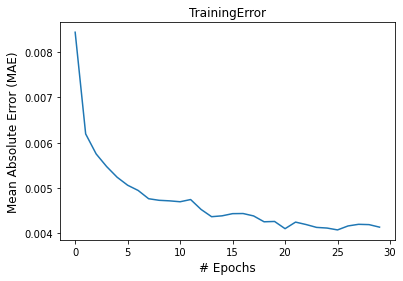

In [48]:
# MAEをプロットしてみよう
fig, ax1 = plt.subplots(1,1)
 
ax1.plot(yen_history.epoch, yen_history.history['loss'])
ax1.set_title('TrainingError')
 
if yen_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

In [49]:
#作成したモデルを使用し予測。
train_pred = yen_model.predict(train_lstm_in)
# test_pred = yen_model.predict(X_test)

In [50]:
train_pred

array([[ 0.02131535],
       [ 0.02625964],
       [ 0.01678122],
       ...,
       [ 0.0017084 ],
       [ 0.00086642],
       [-0.01632197]], dtype=float32)

In [51]:
np.transpose(train_pred)

array([[ 0.02131535,  0.02625964,  0.01678122, ...,  0.0017084 ,
         0.00086642, -0.01632197]], dtype=float32)

In [52]:
len(train_pred)

2064

In [53]:
lstm_train_out

array([ 0.01271095,  0.02951676,  0.01902212, ...,  0.00455942,
       -0.01066412, -0.02221258])

In [54]:
len(lstm_train_out)

2064

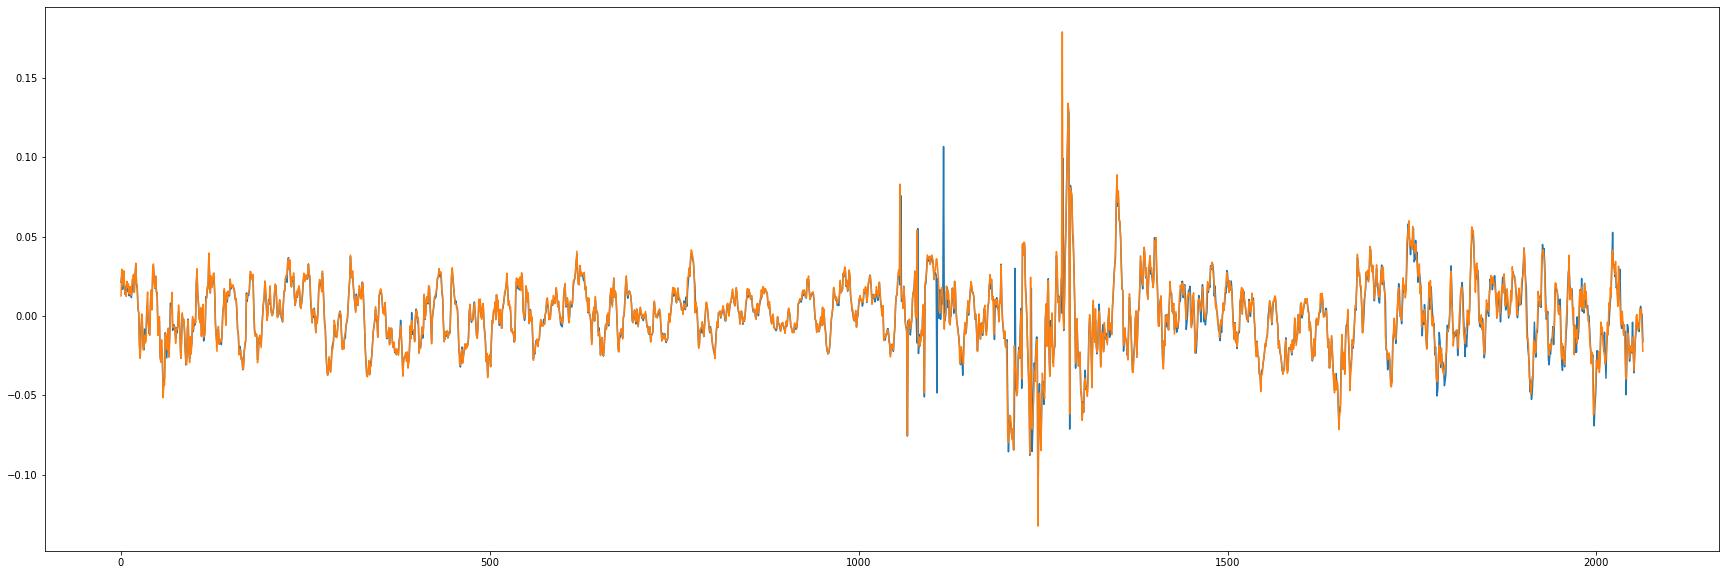

In [55]:
fig,ax = plt.subplots(figsize=(30,10))
# plt.plot(train_pred)

ax.plot(train_pred)
ax.plot(lstm_train_out)
plt.show()

In [56]:
# 配列には変化量が入っているので１００倍
np.transpose(train_pred+1)

array([[1.0213153 , 1.0262597 , 1.0167812 , ..., 1.0017084 , 1.0008664 ,
        0.98367804]], dtype=float32)

In [57]:
np.transpose(train_pred+1)* df_train['Open'].values[:-window_len]

array([[113.68704982, 113.54466674, 113.70916154, ..., 123.33027086,
        123.20199573, 121.23461607]])

In [58]:
(1+lstm_train_out)* df_train['Open'].values[:-window_len]

array([112.72925854, 113.90503049, 113.95976782, ..., 123.68128955,
       121.78264081, 120.50861955])

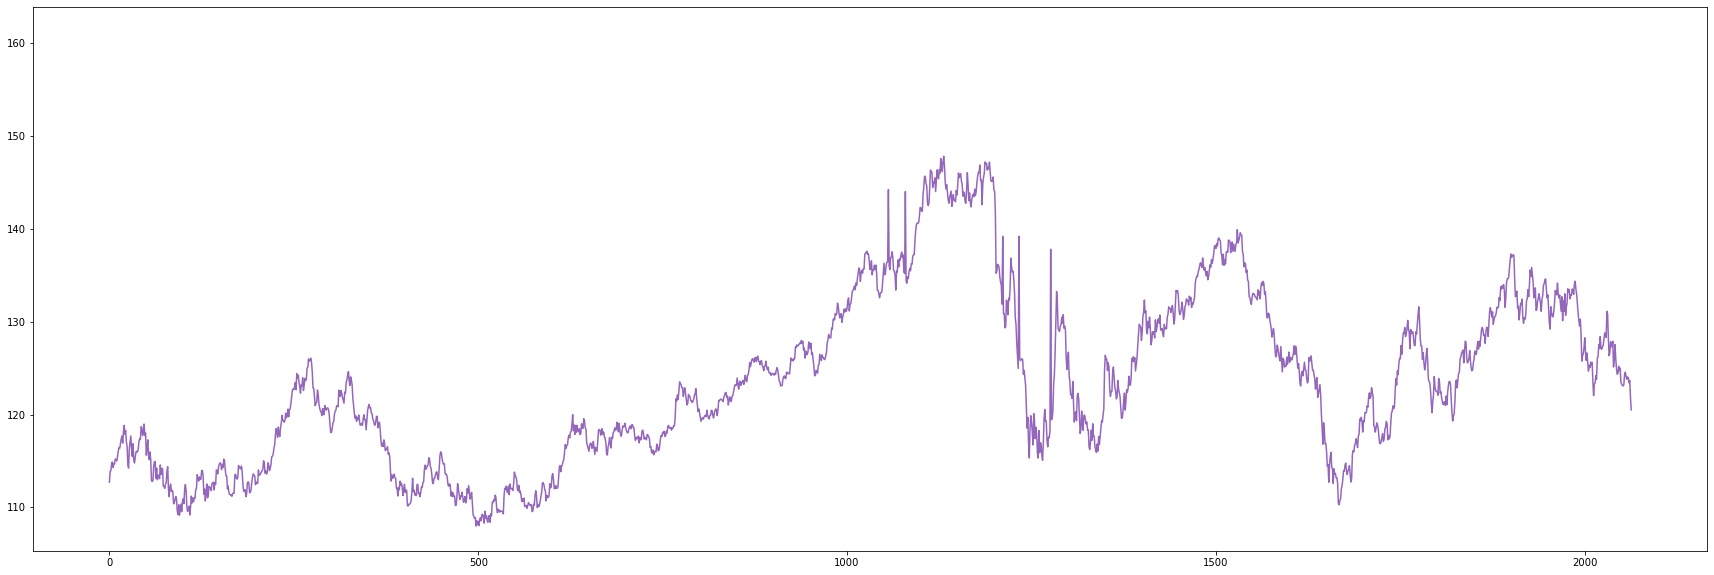

In [59]:
fig,ax = plt.subplots(figsize=(30,10))

# 正解データと予測データの併記
ax.plot(np.transpose(train_pred+1)* df_train['Open'].values[:-window_len])
ax.plot((1+lstm_train_out)* df_train['Open'].values[:-window_len])
plt.show()

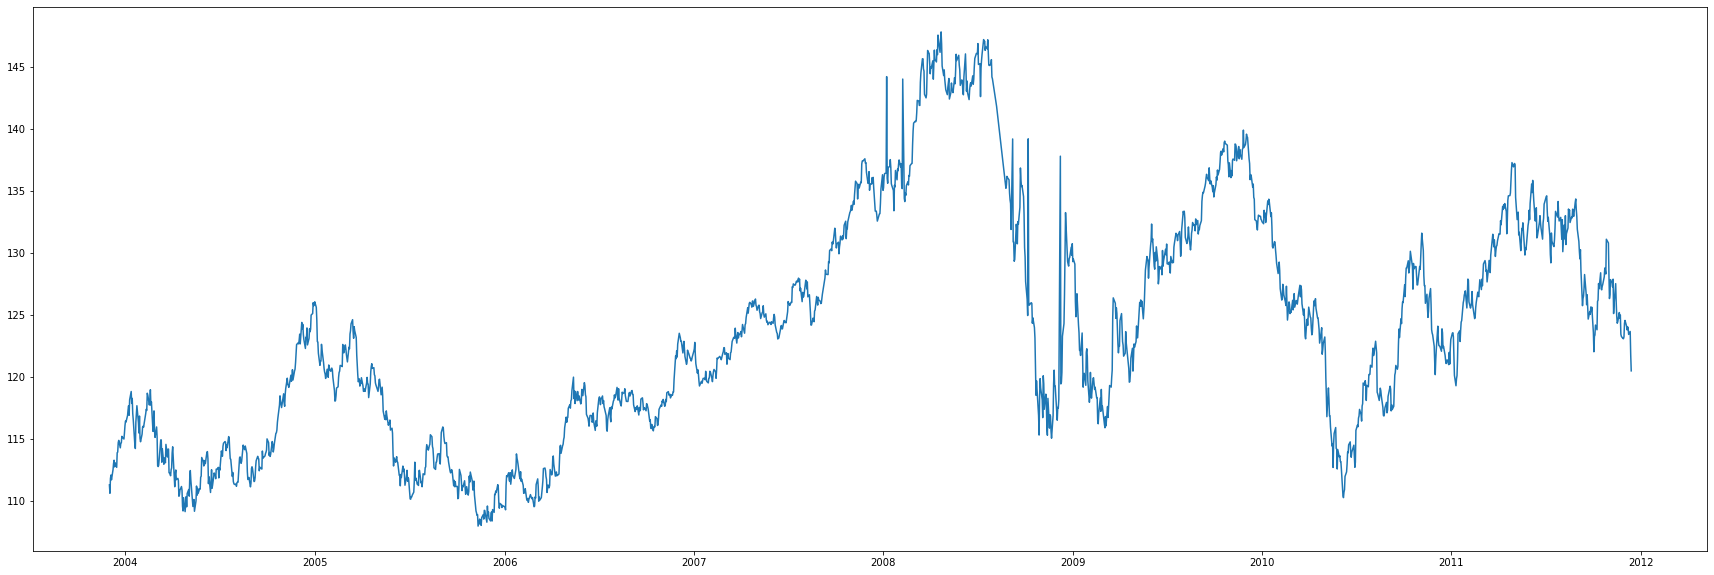

In [60]:
fig,ax = plt.subplots(figsize=(30,10))
# plt.plot(train_pred)

# ax.plot(np.transpose(train_pred+1)* df_train['Open'].values[:-window_len])
ax.plot(df_train['Open'])
# ax.set_xlim(datetime.datetime(2003,12,1), datetime.datetime(2011,12,14)) # 範囲指定
plt.show()

## テストデータへの転用

In [61]:
#作成したモデルを使用し予測。
test_pred = yen_model.predict(test_lstm_in)

In [62]:
test_pred

array([[-2.6987528e-03],
       [ 1.3137236e-05],
       [-1.0840289e-02],
       ...,
       [ 6.5591012e-04],
       [ 2.8070379e-03],
       [ 9.7173238e-03]], dtype=float32)

In [63]:
len(test_pred)

1236

In [64]:
# test予測データ
np.transpose(test_pred+1)* df_test['Open'].values[:-window_len]

array([[119.80877718, 120.5290339 , 119.27529489, ..., 102.5205485 ,
        102.7944479 , 103.5108301 ]])

In [65]:
# test正解データ
(1+lstm_test_out)* df_test['Open'].values[:-window_len]

array([120.7493028 , 119.61104423, 117.69645065, ..., 102.68650234,
       103.42938185, 103.64146143])

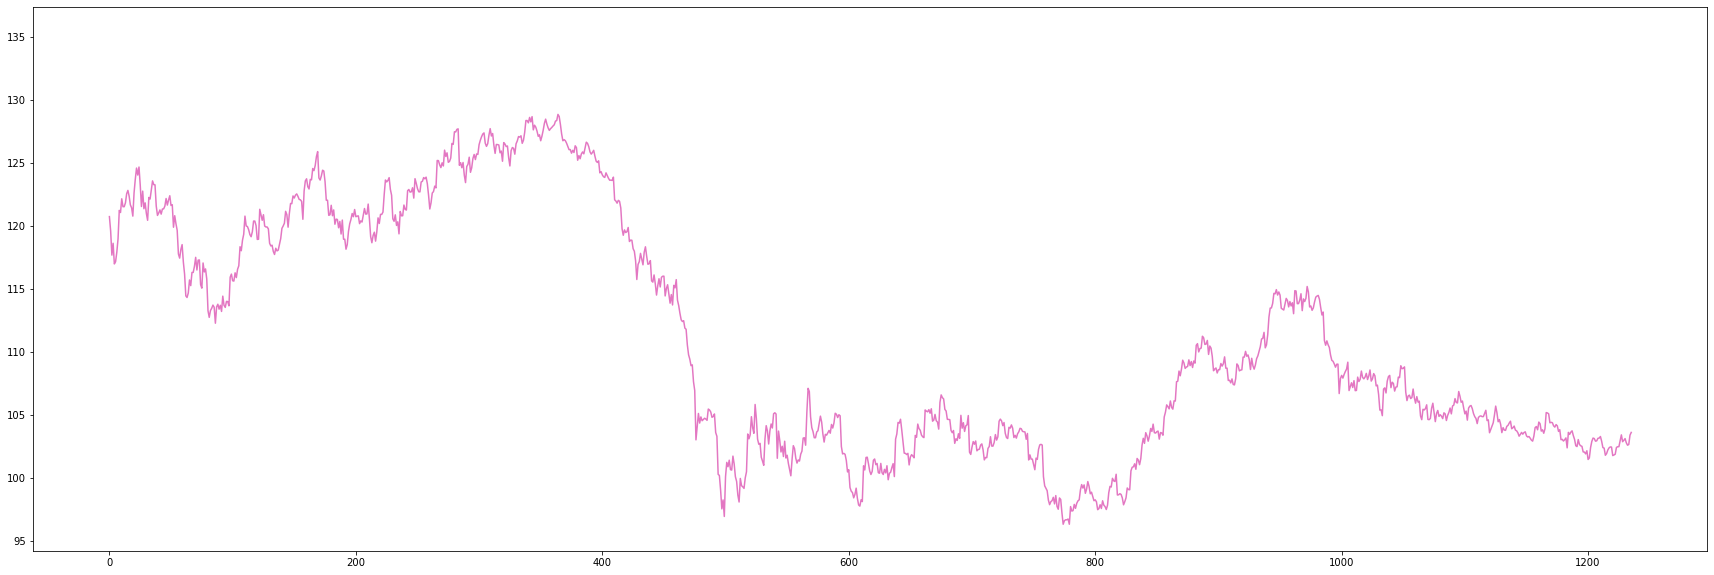

In [66]:
fig,ax = plt.subplots(figsize=(30,10))

# 正解データと予測データの併記
ax.plot(np.transpose(test_pred+1)* df_test['Open'].values[:-window_len])
ax.plot((1+lstm_test_out)* df_test['Open'].values[:-window_len])
plt.show()

In [67]:
## 0/1への変換必要

In [74]:
#必要なライブラリのインポート（評価方法はaccuracy）
from sklearn.metrics import accuracy_score

#今回作成したモデルの汎化性能を確認する。
# print("train:",accuracy_score((1+lstm_train_out)* df_train['Open'].values[:-window_len], np.transpose(train_pred+1)* df_train['Open'].values[:-window_len]))
print("test",accuracy_score((1+lstm_test_out)* df_test['Open'].values[:-window_len], np.transpose(test_pred+1)* df_test['Open'].values[:-window_len]))

ValueError: Found input variables with inconsistent numbers of samples: [1236, 1]

In [ ]:
ax.plot(np.transpose(train_pred+1)* df_train['Open'].values[:-window_len])
ax.plot((1+lstm_train_out)* df_train['Open'].values[:-window_len])

In [ ]:
ax.plot(np.transpose(test_pred+1)* df_test['Open'].values[:-window_len])
ax.plot((1+lstm_test_out)* df_test['Open'].values[:-window_len])